In [34]:
import pandas as pd

df = pd.read_csv('http://pilas.exp.dc.uba.ar/datos/alturas/alturas_500_0.csv')
r, c = df.shape
print("filas {}, columnas {}".format(r,c))

# display(df)

filas 500, columnas 4


In [35]:
df.columns

Index(['altura', 'genero', 'contextura_madre', 'altura_madre'], dtype='object')

In [36]:
df

,altura,genero,contextura_madre,altura_madre
0,171.8,M,mediana,158.2
1,160.1,F,mediana,160.2
2,171.1,M,mediana,159.2
3,161.4,F,mediana,160.4
4,171.1,M,mediana,158.0
...,...,...,...,...
495,174.5,M,alta,162.1
496,158.1,F,mediana,156.7
497,178.2,M,alta,163.6
498,175.8,M,alta,163.1


In [37]:
promedio_alturas = df['altura'].mean()
promedio_alturas

165.54560000000004

In [38]:
mamas_bajitas = df[df['contextura_madre'] == 'bajita']
promedio_alturas_mamas_bajitas = mamas_bajitas['altura'].mean()
promedio_alturas_mamas_bajitas

163.24242424242425

<AxesSubplot:xlabel='contextura_madre', ylabel='altura'>

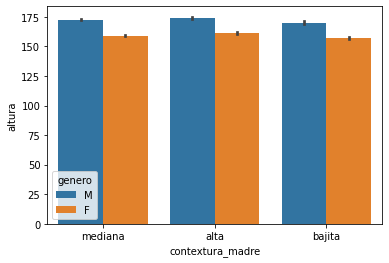

In [39]:
# 7
import seaborn as sns
sns.barplot(df['contextura_madre'],df['altura'],hue= df['genero'])

[(165.0, 180.0)]

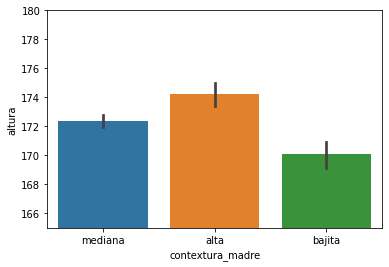

In [40]:
varones = df[df['genero'] == 'M']
r = sns.barplot(df['contextura_madre'],varones['altura'],)
r.set(ylim=(165, 180))

In [41]:
# 8
x_nuevo = 156.5
madres_1565 = df[df['altura_madre'] == x_nuevo]
len(madres_1565)

6

In [42]:
# 9
h = 1
madres_rg1 = df[df['altura_madre'].between(x_nuevo-h, x_nuevo+h, inclusive=True)]
pm1=madres_rg1['altura'].mean()
l1=len(madres_rg1)
l1, pm1

(86, 163.17093023255813)

In [43]:
# 10
h = 2
madres_rg2 = df[df['altura_madre'].between(x_nuevo-h, x_nuevo+h, inclusive=True)]
pm2=madres_rg2['altura'].mean()
l2=len(madres_rg2)
l2, pm2

(171, 163.97777777777776)

In [44]:
# 11
x_nuevo = 159.5
h = 1
madres_rg3 = df[df['altura_madre'].between(x_nuevo-h, x_nuevo+h, inclusive=True)]
pm3=madres_rg3['altura'].mean()
l3=len(madres_rg3)
l3, pm3

(126, 166.47063492063495)

In [45]:
h = 2
madres_rg4 = df[df['altura_madre'].between(x_nuevo-h, x_nuevo+h, inclusive=True)]
pm4=madres_rg4['altura'].mean()
l4=len(madres_rg4)
l4, pm4

(240, 165.90208333333334)

In [46]:
l = [l1,l2,l3,l4]
pm = [pm1,pm2,pm3,pm4]
promedio_alturas = dict(zip(l,pm))
promedio_alturas

{86: 163.17093023255813,
 171: 163.97777777777776,
 126: 166.47063492063495,
 240: 165.90208333333334}

In [47]:
# 12
def predigo_promedio_movil(X,Y,x_nuevos,ventana):
    pms = []
    for x_nuevo in x_nuevos:
        madres_rg = df[df['{}'.format(X)].between(x_nuevo-ventana, x_nuevo+ventana, inclusive=True)]
        pm=madres_rg['{}'.format(Y)].mean()
        pms.append(pm)
    return pms

alturas_madres = df['altura_madre'].unique().tolist()
alturas_madres.sort()



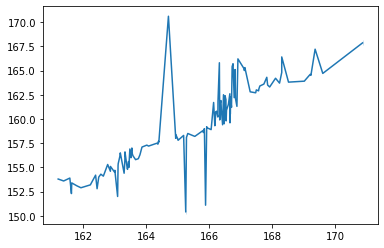

In [48]:
# 13
predigo_alturas_h1 = predigo_promedio_movil(X='altura_madre',Y='altura',x_nuevos=alturas_madres ,ventana=1)
s1 = sns.lineplot(predigo_alturas_h1,alturas_madres,)

In [49]:
# 14 
predigo_alturas_h2 = predigo_promedio_movil(X='altura_madre',Y='altura',x_nuevos=alturas_madres ,ventana=2)
predigo_alturas_h10 = predigo_promedio_movil(X='altura_madre',Y='altura',x_nuevos=alturas_madres ,ventana=10)

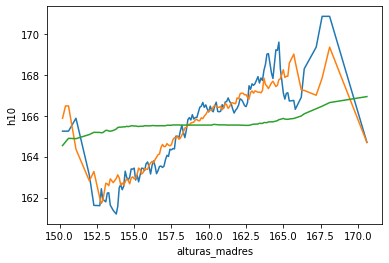

In [50]:
promedios = pd.DataFrame(
    {'alturas_madres': alturas_madres,
    'h1': predigo_alturas_h1,
    'h2': predigo_alturas_h2,
    'h10': predigo_alturas_h10,     
    })

pr1 = sns.lineplot(promedios['alturas_madres'],promedios['h1'],)
pr2 = sns.lineplot(promedios['alturas_madres'],promedios['h2'],)
pr3 = sns.lineplot(promedios['alturas_madres'],promedios['h10'],)

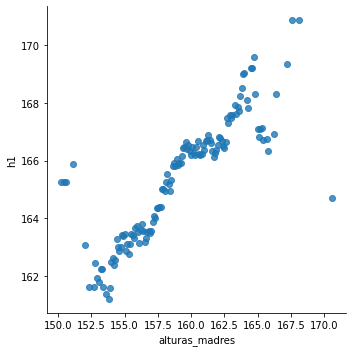

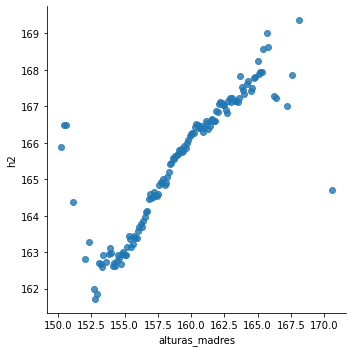

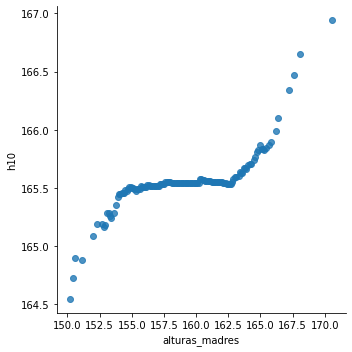

In [51]:
# 15
sns.lmplot('alturas_madres','h1', data=promedios, fit_reg=False)
sns.lmplot('alturas_madres','h2', data=promedios, fit_reg=False)
sns.lmplot('alturas_madres','h10', data=promedios, fit_reg=False)

<AxesSubplot:xlabel='altura_madre', ylabel='altura'>

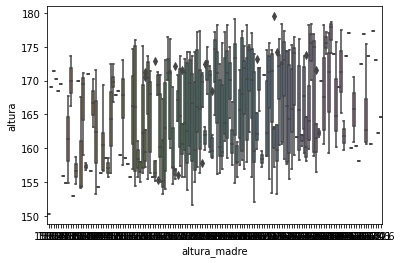

In [52]:
sns.boxplot('altura_madre', 'altura', data=df)

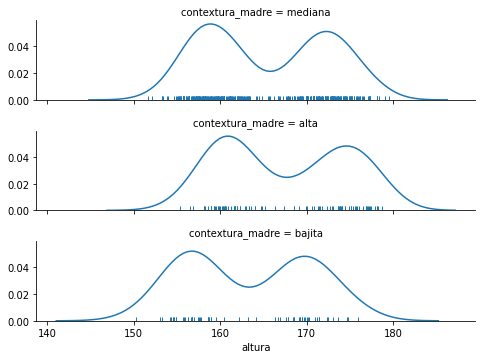

In [53]:
g = sns.FacetGrid(df, row="contextura_madre",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "altura", hist=False, rug=True);

In [54]:
# 16

# Devuelve los k contiguos para cada valor en la lista 
def k_contiguos_todos_lista(lista,k):
    for i,j in enumerate(lista):
        if i-k<0:
            pass
        elif i+k<len(lista):
            contiguo = lista[i-k : i+k+1] 

# Devuelve k contiguos de 1 elemento x_nuevo
def k_contiguos_ele_lista(lista,k,x_nuevo):
    i = lista.index(x_nuevo)
    if i-k<0:
        pass
    elif i+k<len(lista):
        contiguo = lista[i-k : i+k+1] 
    return contiguo


def predigo_promedio_vecinos(X,Y,x_nuevo,k):
    alturas_madres = df['{}'.format(X)].unique().tolist()
    alturas_madres.sort()
    contiguos = k_contiguos_ele_lista(alturas_madres,k,x_nuevo)
    madres_rg = df[df['{}'.format(X)].isin(contiguos)]
    pm_hijitus=madres_rg['{}'.format(Y)].mean()
    return pm_hijitus

predigo_promedio_vecinos(X='altura_madre',Y='altura',x_nuevo=160.4,k=2)

168.640625

In [157]:
# 17

def cuadrados_minimos(dataframe,X,Y):
    x_barra = dataframe['{}'.format(X)].mean()
    y_barra = dataframe['{}'.format(Y)].mean()
    w = ((dataframe['{}'.format(X)] - x_barra) *(dataframe['{}'.format(Y)] - y_barra)).sum()
    z = ((dataframe['{}'.format(X)] - x_barra) ** 2).sum()
    m = w/z
    b = y_barra - m*x_barra
    return m, b

In [156]:
# 18
m, b = cuadrados_minimos(dataframe=df,X='altura_madre',Y='altura')
x = 156.5
y = m*x + b
muestra = df[(df['altura_madre']==156.5 ) & (df['genero']=='M')]
y, muestra['altura'].mean()

(164.17093694226418, 169.45)

<AxesSubplot:xlabel='alturas_madres', ylabel='h2'>

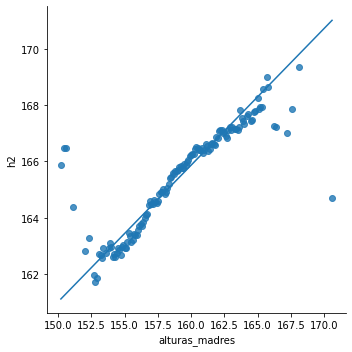

In [189]:
x = df['altura_madre'].values
sns.lmplot('alturas_madres','h2', data=promedios, fit_reg=False)
sns.lineplot(x, m*x + b)

In [174]:
# 19
from scipy import stats
slope_masculino, intercept, r, p, std_err = stats.linregress(df[filtro_masculino]['altura_madre'], df[filtro_masculino]['altura'])
print("El valor de la pendiente de la recta de minimos cuadadros para hijes masculinos es",slope_masculino)

NameError: name 'filtro_masculino' is not defined

In [201]:
x_mas = df[(df['genero']=='M')]['altura'].values
x_fem = df[(df['genero']=='F')]['altura'].values

<AxesSubplot:xlabel='alturas_madres', ylabel='h2'>

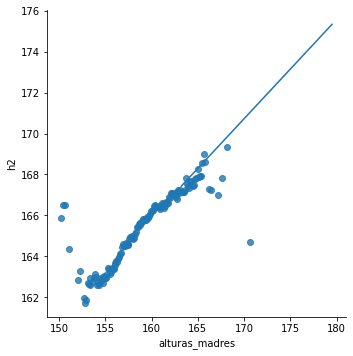

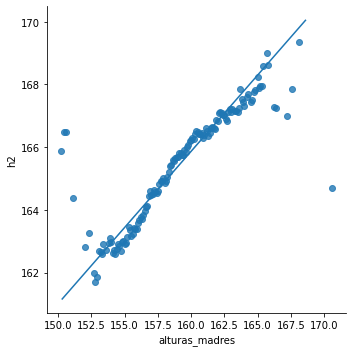

In [200]:
sns.lmplot('alturas_madres','h2', data=promedios, fit_reg=False)
sns.lineplot(x_mas, m*x_mas + b)
sns.lmplot('alturas_madres','h2', data=promedios, fit_reg=False)
sns.lineplot(x_fem, m*x_fem + b)

In [208]:
y = [0, 9, 9, 1]
e = [6, 1]
for i in range(0, 4):
    y.append(4)
    print(y)
print(y[3])

[0, 9, 9, 1, 4]
[0, 9, 9, 1, 4, 4]
[0, 9, 9, 1, 4, 4, 4]
[0, 9, 9, 1, 4, 4, 4, 4]
1
